In [1]:
import skimage

path = './water.jpg'

image = skimage.io.imread(path) # Load image
image = skimage.color.rgb2gray(image) # Convert to grayscale

In [2]:
print(image.shape)

(667, 1000)


In [3]:
#Now, using the image as a data set, we can utilize sklearn.decomposition.PCA to calculate the principal components.
#Calculate the principal components for a given image
#Transform (project) the image into the basis of the calculated principal components

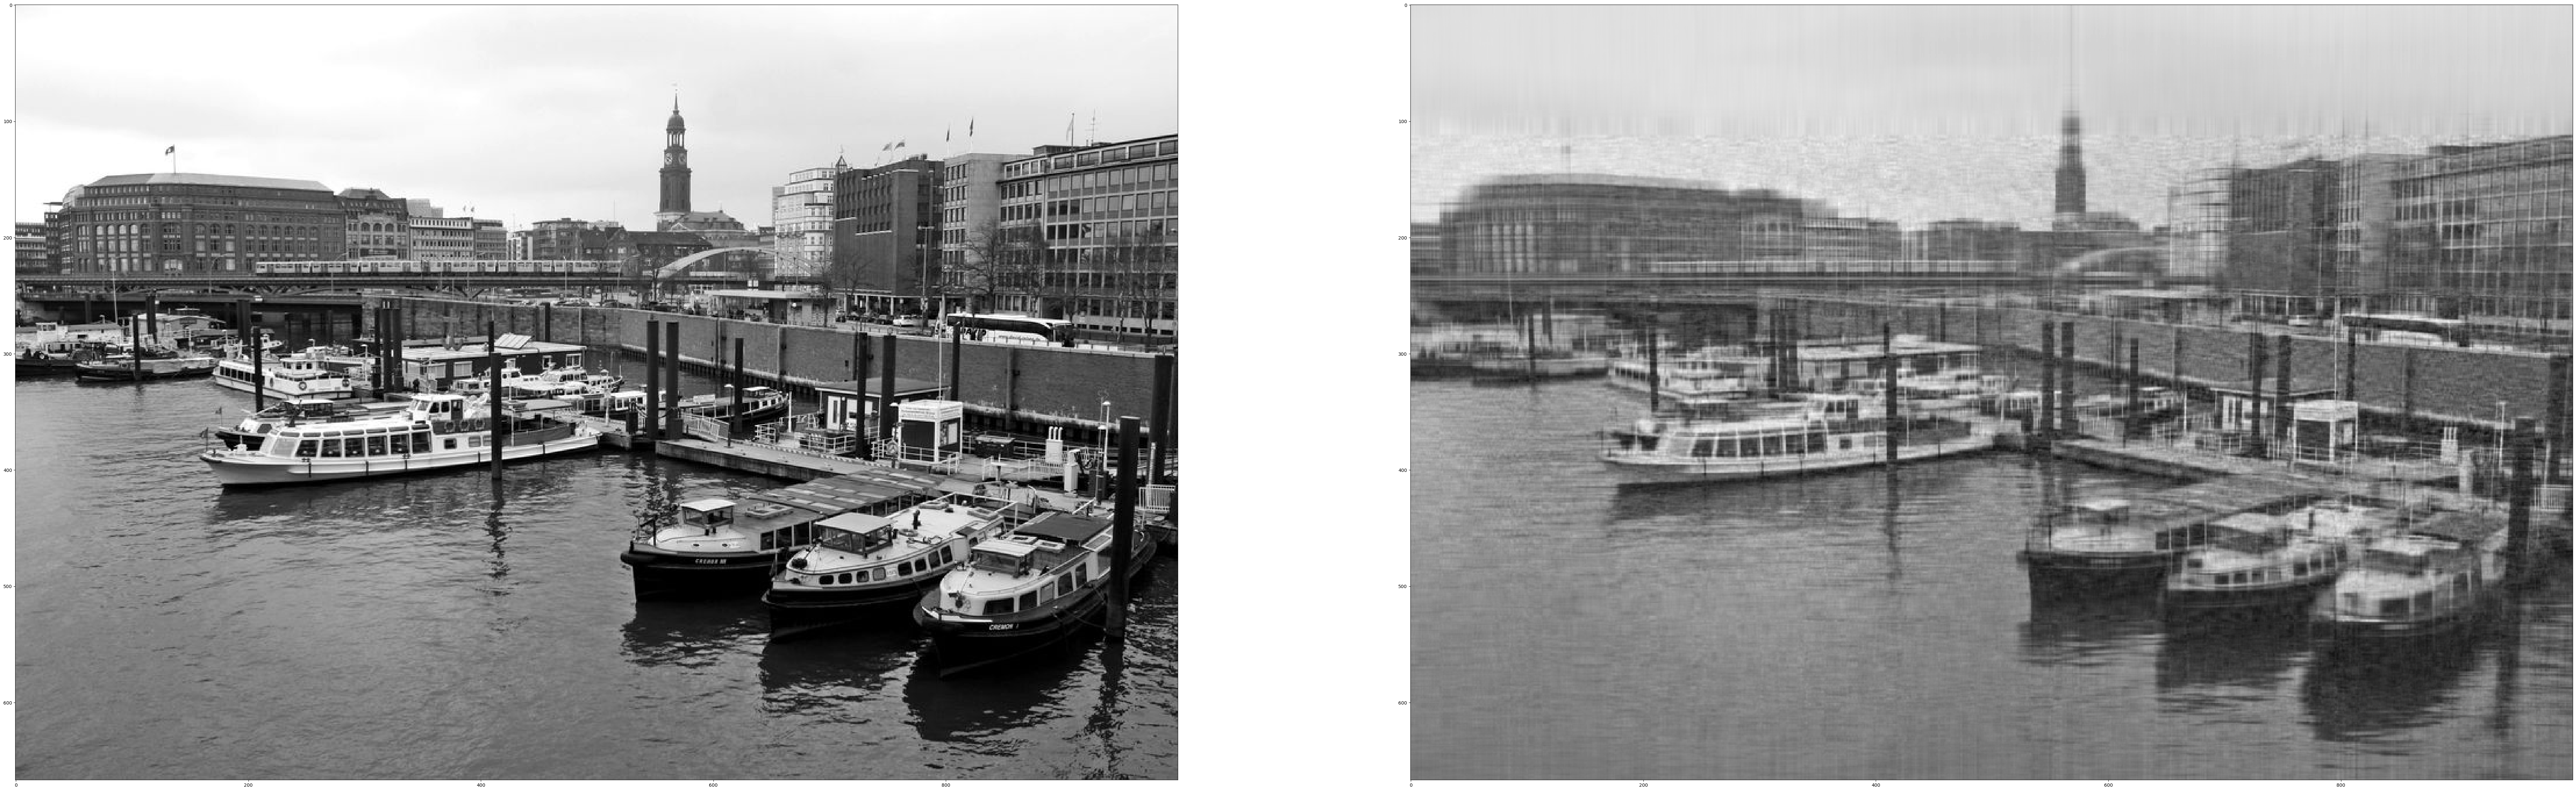

In [4]:
#to compress the image using only 50 PCA vectors
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components=50)
image_compressed = pca.fit_transform(image)
image_decompressed = pca.inverse_transform(image_compressed)

fig, axes = plt.subplots(1,2, figsize=(100, 100))
axes[0].imshow(image, cmap='gray')
axes[0].set_label("Original image")
axes[1].imshow(image_decompressed, cmap='gray')
axes[1].set_label("Compressed image")

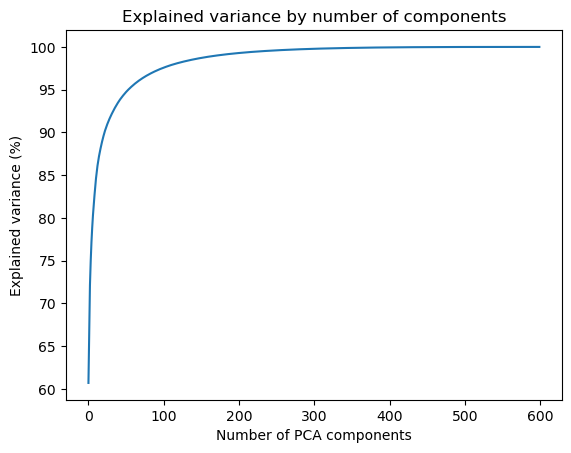

In [5]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt 
import numpy as np
# Calculate 600 first principal components
pca = PCA(n_components=600).fit(image) 

# Collect the explained variance of each component
explained_variance = pca.explained_variance_ratio_ 

# Component indices
components = [i for i in range(0, len(explained_variance))] 

# Explained variance in percents
explained_variance_percent = [100 * i for i in explained_variance] 

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.set_title('Explained variance by number of components')
ax.set_ylabel('Explained variance (%)')
ax.set_xlabel('Number of PCA components')

# Cumulative sum of the explained variance
ax.plot(components, np.cumsum(explained_variance_percent))

image compressed size (667, 8)
image compressed size (667, 29)
image compressed size (667, 73)
image compressed size (667, 254)
image compressed size (667, 580)


Text(0.5, 1.0, 'Original image')

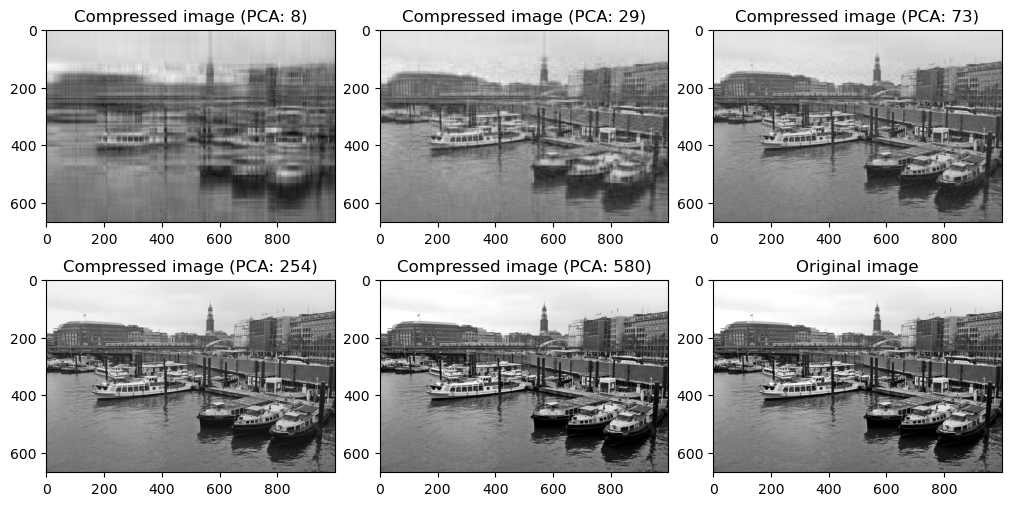

In [26]:
# Utility function that compresses image with given number
# of principal components
def compress_image(n_components, image):
    pca = PCA(n_components=n_components)
    image_compressed = pca.fit_transform(image)
    print("image compressed size",image_compressed.shape)
    return pca.inverse_transform(image_compressed)

# Compress images with different numbers of principal components
image_8 = compress_image(8, image)
image_29 = compress_image(29, image)
image_73 = compress_image(73, image)
image_254 = compress_image(254, image)
image_580 = compress_image(580, image)

fig, axes = plt.subplots(2,3, figsize=(10,5), constrained_layout=True)

axes[0][0].imshow(image_8, cmap='gray')
axes[0][0].set_title("Compressed image (PCA: 8)")

axes[0][1].imshow(image_29, cmap='gray')
axes[0][1].set_title("Compressed image (PCA: 29)")

axes[0][2].imshow(image_73, cmap='gray')
axes[0][2].set_title("Compressed image (PCA: 73)")

axes[1][0].imshow(image_254, cmap='gray')
axes[1][0].set_title("Compressed image (PCA: 254)")

axes[1][1].imshow(image_580, cmap='gray')
axes[1][1].set_title("Compressed image (PCA: 580)")

axes[1][2].imshow(image, cmap='gray')
axes[1][2].set_title("Original image")

In [25]:
print("image8 shape is",image_8.shape)
print("image29 shape is" ,image_29.shape)
print("image73 shape is" ,image_73.shape)
print("image254 shape is", image_254.shape)
print("image580 shape is", image_580.shape)

image8 shape is (667, 1000)
image29 shape is (667, 1000)
image73 shape is (667, 1000)
image254 shape is (667, 1000)
image580 shape is (667, 1000)
